#Determines the Electronic charge density along Z axis.


path="" refers to the path of the dump file from which data is to be extracted

frames=------ number of frames during openmd execution

atomNumber=----------- total number of atomic sites during program execution

In [2]:
# extract information from dump file.


import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
import pandas as pan
import scipy as sci
import sys
%matplotlib inline

In [9]:
#==================================================================================================================
folderPath="/home/hbhattar/afs/Hemanta/metals/PtOxygenAdatom/Pt5OadAtom.dump"
#folderPath="/home/hbhattar/afs/Hemanta/metals/ImageCharge/Pt111ZhouComparedWithOAdatom/NaImageCharge-.dump"
path=folderPath#+"Slab_9_layers_Zhou_KSmall.dump"; 
frames=100;              #total frames in dump file
atomNumber=437;         #total atoms in lattice


#====================================================================================================================


fileDump=open(path)  #dump file for info extraction
linesDump=fileDump.readlines()

processP="Wait"
processC="Wait"


#information storage matrix 
#posiiton and velocity storage
x=num.zeros((frames,atomNumber))
y=num.zeros((frames,atomNumber))
z=num.zeros((frames,atomNumber))
#fx=num.zeros((frames,atomNumber))
#fy=num.zeros((frames,atomNumber))
#fz=num.zeros((frames,atomNumber))
vx=num.zeros((frames,atomNumber))
vy=num.zeros((frames,atomNumber))
vz=num.zeros((frames,atomNumber))


#charge and velocity storage matrix
c=num.zeros((frames,atomNumber))
cv=num.zeros((frames,atomNumber))
ey=num.zeros((frames,atomNumber))
ex=num.zeros((frames,atomNumber))
ez=num.zeros((frames,atomNumber))
#frame count initilization
fCount=0
index=0  #index for the atoms
for line in linesDump:
    linesSplit=str.split(line)
    length=len(linesSplit)
    
    if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
        processP="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
        processP="Wait"
        index=0
        continue;
        
    elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
        processC="Start"
        continue;
        
    elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
        fCount=fCount+1
        index=0;
        processC="Wait"
        continue;
   
    elif(fCount>=frames):
        break;
        
    else:
        processP=processP;
        processC=processC;
        
        
    if (processP=="Start"):
        x[fCount][index]=float(linesSplit[2])
        y[fCount][index]=float(linesSplit[3])
        z[fCount][index]=float(linesSplit[4])
        vx[fCount][index]=float(linesSplit[5])
        vy[fCount][index]=float(linesSplit[6])
        vz[fCount][index]=float(linesSplit[7])
        #fx[fCount][index]=float(linesSplit[8])
        #fy[fCount][index]=float(linesSplit[9])
        #fz[fCount][index]=float(linesSplit[10])
        index=index+1
        
    if(processC=="Start"):
        c[fCount][index]=float(linesSplit[3])
        cv[fCount][index]=float(linesSplit[4])
        ez[fCount][index]=float(linesSplit[7])
        ey[fCount][index]=float(linesSplit[6])
        ex[fCount][index]=float(linesSplit[5])
        index=index+1
       

In [10]:
#determine the layers
a=num.sort(list(set(z[0,0:atomNumber])))
layer=[]
for var in a:
    layer.append(num.where(z[0]==var))
    


In [11]:
Ex=[]
Ey=[]
Ez=[]
charge=[]
framing=0
for items in range(a.size):
    Ex.append(sum(ex[framing][layer[items][0]])/float(layer[items][0].size))
    Ey.append(sum(ey[framing][layer[items][0]])/float(layer[items][0].size))
    Ez.append(sum(ez[framing][layer[items][0]])/float(layer[items][0].size))
    charge.append(sum(c[framing][layer[items][0]])/float(layer[items][0].size))
    
    
 

In [12]:
c.shape
print(a)
layer

[ -9.052852  -6.789639  -4.526426  -2.263213  -0.         2.263213
   4.526426   6.789639   9.052852  12.      ]


[(array([  0,   1,   3,   4,   5,   7,   8,   9,  10,  18,  19,  20,  30,
          31,  32,  34,  35,  36,  37,  45,  46,  47,  48,  61,  62,  63,
          64,  84, 102, 103, 104, 105, 106, 114, 115, 116, 117, 130, 131,
         132, 133, 153, 216, 220, 221, 222, 223, 243]),),
 (array([  2,   6,  11,  12,  13,  14,  21,  22,  23,  33,  38,  39,  40,
          41,  49,  50,  51,  52,  65,  66,  67,  68,  85,  86, 107, 108,
         109, 110, 118, 119, 120, 121, 134, 135, 136, 137, 154, 155, 156,
         217, 224, 225, 226, 227, 244, 245, 246, 330]),),
 (array([ 15,  16,  17,  24,  25,  26,  42,  43,  44,  53,  54,  55,  56,
          69,  70,  71,  72,  87,  88,  89, 111, 112, 113, 122, 123, 124,
         125, 138, 139, 140, 141, 157, 158, 159, 160, 177, 218, 228, 229,
         230, 231, 247, 248, 249, 250, 267, 331, 336]),),
 (array([ 27,  28,  57,  58,  59,  73,  74,  75,  76,  90,  91,  92, 126,
         127, 128, 142, 143, 144, 145, 161, 162, 163, 164, 178, 179, 180,
         181

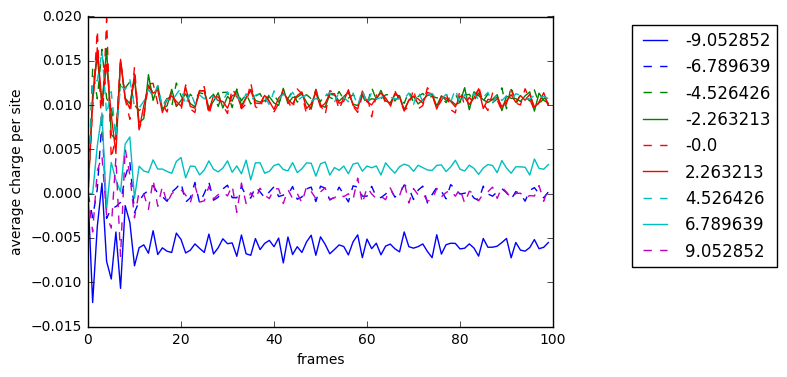

In [13]:
colors=['b','b--', 'g--','g','r--','r','c--','c','m--','m','y--','y'\
        , 'k--','k','b-.','g-.','r-.','c-.','m-.','y-.','k-.']
fig = plt.figure(1)
ax = fig.add_subplot(111)

for counter in range(len(a)-1):
    lab.plot(num.sum(c[:,layer[counter][0]],axis=1)/len(layer[counter][0]),colors[counter],label=a[counter])
    

handles, labels = ax.get_legend_handles_labels()
lab.xlabel("frames")
lab.ylabel("average charge per site")
lgd=lab.legend(bbox_to_anchor=(1.5,1),loc="upper right")
#lab.savefig(folderPath+"chargeLayersDaw_Ksmall.eps",bbox_extra_artists=(lgd,), bbox_inches='tight')
lab.show()

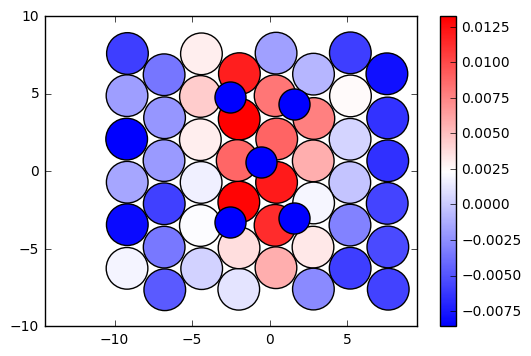

In [14]:
xx=x[99,layer[8][0]]
yy=y[99,layer[8][0]]
colors=c[99,layer[8][0]]


xxo=x[99,layer[9][0]]
yyo=y[99,layer[9][0]]



plt.scatter(xx, yy, c=colors, s=900, cmap='bwr',linewidth=1)
plt.colorbar()
plt.scatter(xxo, yyo,s=500)

plt.axes().set_aspect('equal', 'datalim')


plt.show()

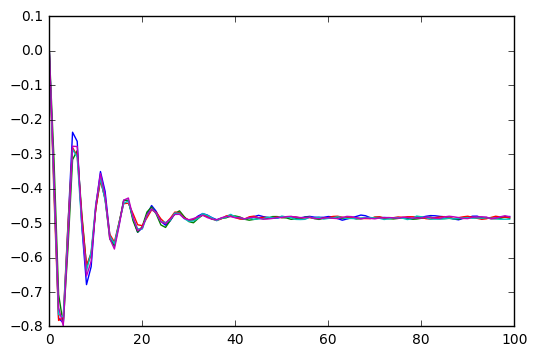

In [19]:
lab.plot(c[:,layer[9][0]])
lab.show()

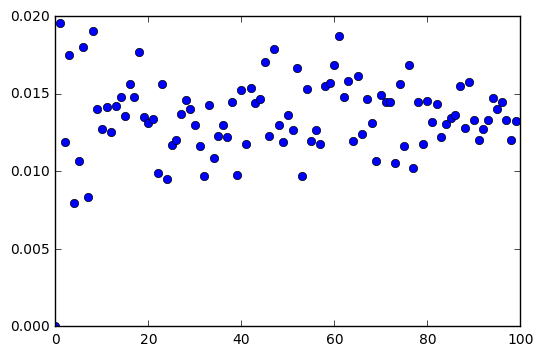

In [16]:
lab.plot(num.max(c[:,layer[8][0]],axis=1),'o')

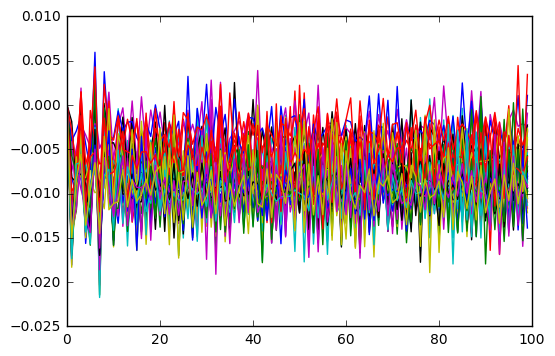

In [119]:
lab.plot(c[:,layer[8][0]])
lab.show()

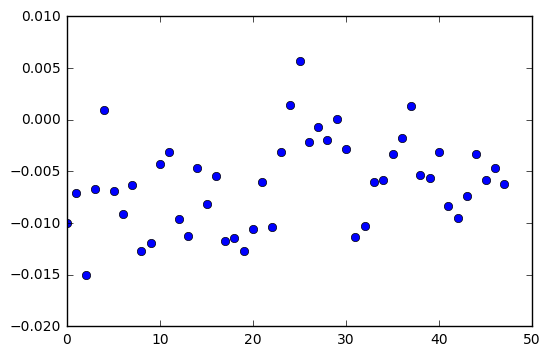

In [23]:
lab.plot(c[99,layer[8][0]],'o')

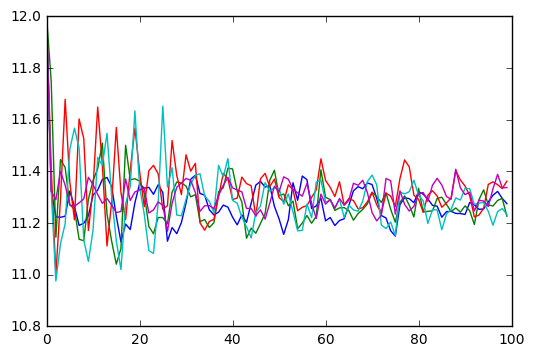

In [17]:

lab.plot(z[:,layer[9][0]])
lab.show()

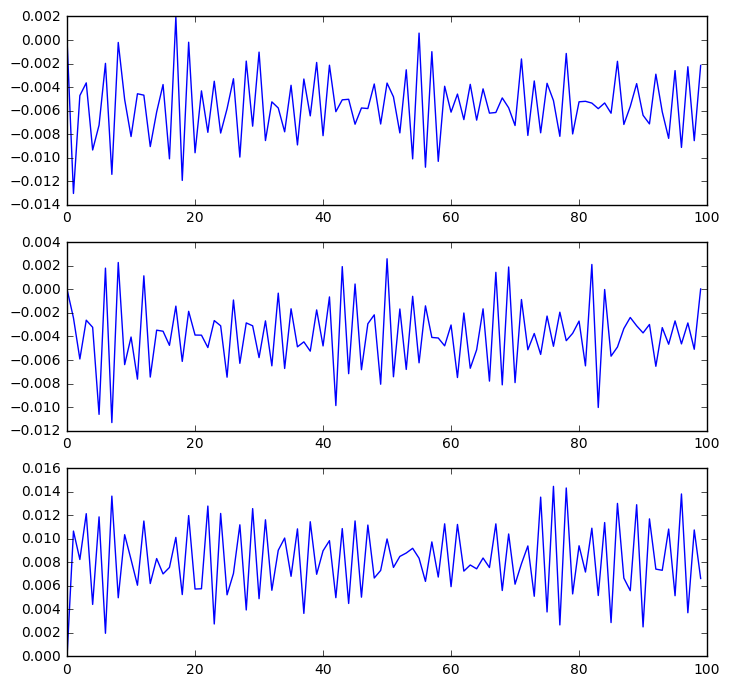

In [19]:
fig1=plt.figure(figsize=(8,8))
ax1=fig1.add_subplot(3,1,1)
ax2=fig1.add_subplot(3,1,2)
ax3=fig1.add_subplot(3,1,3)

#---------------------------------------
#subplot adjust
left  =0.1# the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2  # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height
    
fig1.subplots_adjust(left=left,right=right,bottom=bottom,top=top,wspace=wspace,hspace=hspace)

ax1.plot(c[:,379])
ax2.plot(c[:,391])
ax3.plot(c[:,393])
plt.show()


In [20]:
def localizedPlot(x,y,z,c,layer,layernumber,threshold,frame,whichOatom):
    Olayer=layernumber[0]
    Ptlayer=layernumber[1]
    positionOfOatom=[x[frame][layer[Olayer][0][whichOatom]],y[frame][layer[Olayer][0][whichOatom]]]
    posx2=x[frame][layer[Ptlayer][0]]>=(positionOfOatom[0]-threshold)
    posx1=x[frame][layer[Ptlayer][0]]<=(positionOfOatom[0]+threshold)
    posx=num.logical_and(posx1,posx2)

    posy2=y[frame][layer[Ptlayer][0]]>=(positionOfOatom[1]-threshold)
    posy1=y[frame][layer[Ptlayer][0]]<=(positionOfOatom[1]+threshold)
    posy=num.logical_and(posy1,posy2)

    pos=num.logical_and(posx,posy)
    
    posfinal=layer[Ptlayer][0][pos]

    
    
    xx=x[frame,posfinal]
    yy=y[frame,posfinal]
    colors=c[frame,posfinal]


    

    plt.scatter(xx, yy, c=colors, s=900, cmap='bwr',linewidth=1)
    plt.colorbar()
    plt.scatter(positionOfOatom[0],positionOfOatom[1],s=200,c='white')
    for i in range(len(posfinal)):
        lab.annotate(str(posfinal[i]), (xx[i],yy[i]))
    plt.axes().set_aspect('equal', 'datalim')


    plt.show()

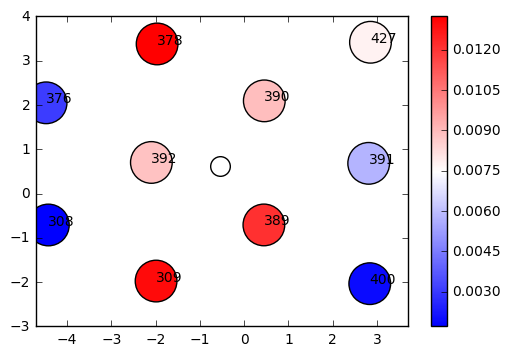

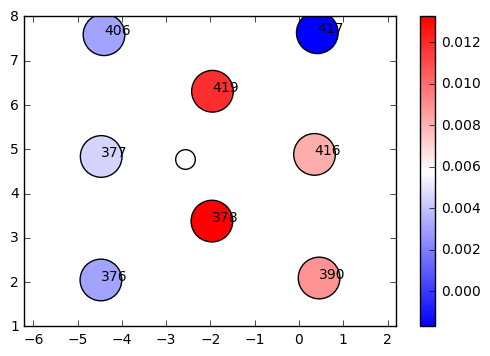

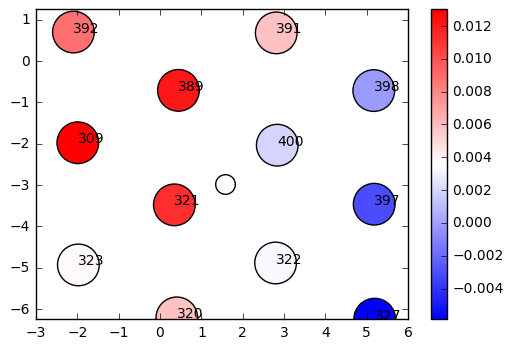

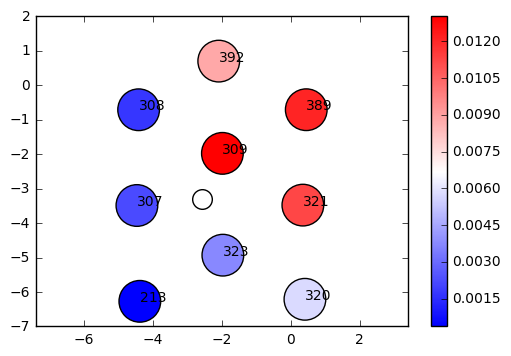

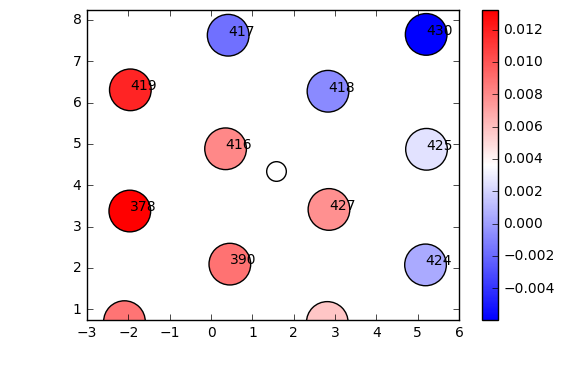

In [22]:
localizedPlot(x,y,z,c,layer,[9,8],4,99,0)
localizedPlot(x,y,z,c,layer,[9,8],4,99,1)
localizedPlot(x,y,z,c,layer,[9,8],4,99,2)
localizedPlot(x,y,z,c,layer,[9,8],4,99,3)
localizedPlot(x,y,z,c,layer,[9,8],4,99,4)

